## Macroeconomic Talking Points (February 05, 2023)

### Professor Timothy H. Savage, Ph.D. CRE

#### NYU Schack Institute of Real Estate

#### Faculty Director | CREFC Center for Real Estate Finance at NYU Schack

#### Faculty Co-Director | NYU SPS Applied Analytics Lab

#### Mentor | Real Estate Research Institute

#### Cheif Economist | Haystacks.AI

In [1]:
%pylab inline
from IPython.display import Image
import urllib.request as url
import io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels as sm
import statsmodels.formula.api as smf
import statsmodels.api as sma
import patsy
from statsmodels.graphics.api import abline_plot
import numpy.linalg as linalg
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, rc=None)

import datetime as dt
from fredapi import Fred
fred = Fred(api_key='30e6ecb242a73869e11cb35f6aa3afc3')

Populating the interactive namespace from numpy and matplotlib


## The Prior U.S. Economic Cycle (2009 - 2019)
* Hated By Many



> Barry Ritholtz, [Why So Many People Hate This Recovery](https://www.bloomberg.com/opinion/articles/2015-11-16/why-so-many-people-hate-this-economic-recovery)

## June 2020
* Q2 2020 GDP contraction much larger than global financial crisis.
* 10-year U.S. Treasury had fallen to ~50 bps.
* NBER formally declares the U.S. to be in a recession. 

## The Current Economic Cycle (2021 - ?)

* Current headline inflation is driven by distortions in consumption patterns that are beginning to resolve.     
* The U.S. is not in a recession based on labor market performance, Q3 GDP actuals and Q4 GDP forecasts.
* The yield curve has been negative for about two months, but the ten-year breakeven remains close to the Fed's stated goal of two percent.
* Nominal and real growth will be positive for 2022, but monetary tightening is the steepest on record, involving both the FFR and the balance sheet.
* Equity markets are off by ~20% from their peak. 
* Global oil prices are at pre-invasion levels.    
* The share of the fully-vaccinated population above five years old stands at ~68% with a daily bivariant vaccination rate that is negligible.  

## Cap Rates

* During the early days of the pandemic, when deals were scarce, I was comfortable saying that cap rates would compress based on cap rate research.
* Many of the factors that drive cap rates, such as monetary policy and the strength of the U.S., have reversed.  There is now upward pressure on cap rates.  

In [2]:
ten_year = fred.get_series("DGS10", observation_start='1990-01-01')
one_year = fred.get_series("DGS1", observation_start='1990-01-01')
three_month = fred.get_series("DGS3MO", observation_start='1990-01-01')

Text(0, 0.5, '%')

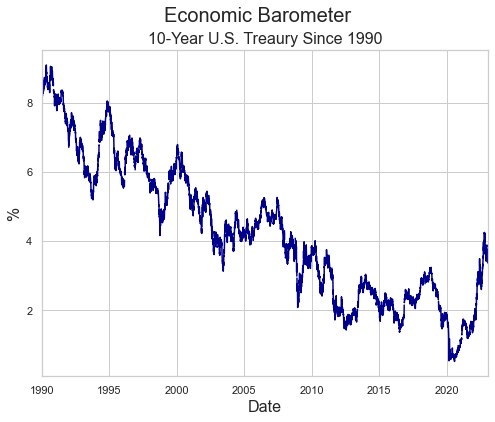

In [3]:
ten_year.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Economic Barometer', fontsize=20)
plt.title('10-Year U.S. Treaury Since 1990', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)

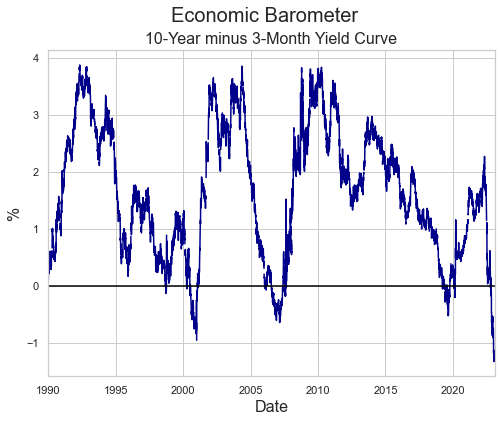

In [4]:
yield_curve = fred.get_series("T10Y3M", observation_start='1990-01-01')
yield_curve.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Economic Barometer', fontsize=20)
plt.title('10-Year minus 3-Month Yield Curve', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axhline(0, color="black")

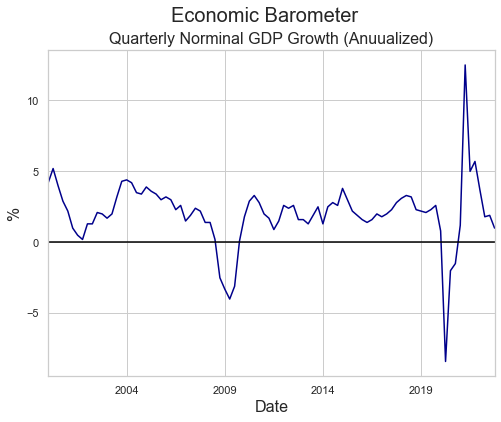

In [5]:
growth = fred.get_series("A191RO1Q156NBEA", observation_start='2000-01-01')
growth.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Economic Barometer', fontsize=20)
plt.title('Quarterly Norminal GDP Growth (Anuualized)', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axhline(0, color='black')

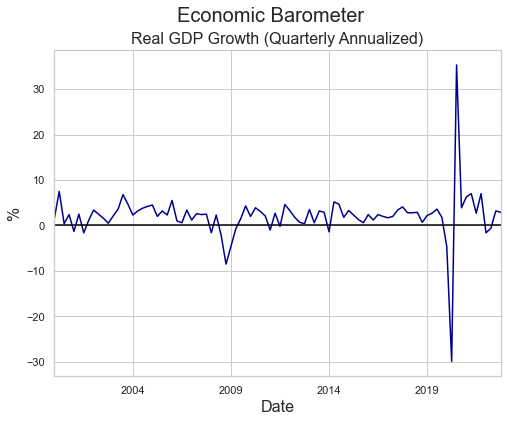

In [6]:
growth = fred.get_series("A191RL1Q225SBEA", observation_start='2000-01-01').dropna()
growth.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Economic Barometer', fontsize=20)
plt.title('Real GDP Growth (Quarterly Annualized)', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axhline(0, color="black")

Text(0, 0.5, 'Tillions $')

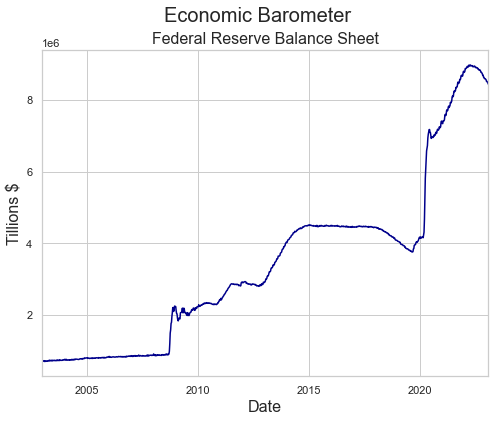

In [7]:
balance_sheet = fred.get_series("WALCL", observation_start='1990-01-01')
balance_sheet.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Economic Barometer', fontsize=20)
plt.title('Federal Reserve Balance Sheet', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Tillions $', fontsize=16)

Text(0, 0.5, '')

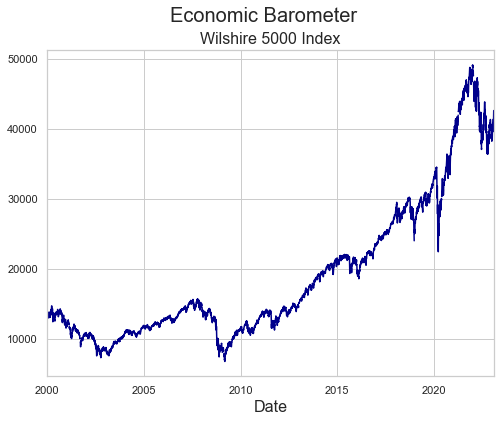

In [8]:
wilshire = fred.get_series("WILL5000PR", observation_start='2000-01-01')
wilshire.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Economic Barometer', fontsize=20)
plt.title('Wilshire 5000 Index', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('', fontsize=16)

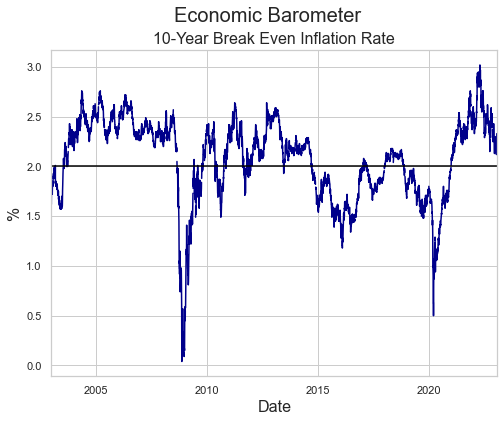

In [9]:
break_even = fred.get_series("T10YIE", observation_start='1990-01-01')
break_even.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Economic Barometer', fontsize=20)
plt.title('10-Year Break Even Inflation Rate', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axhline(2, color="black")

Text(0, 0.5, '%')

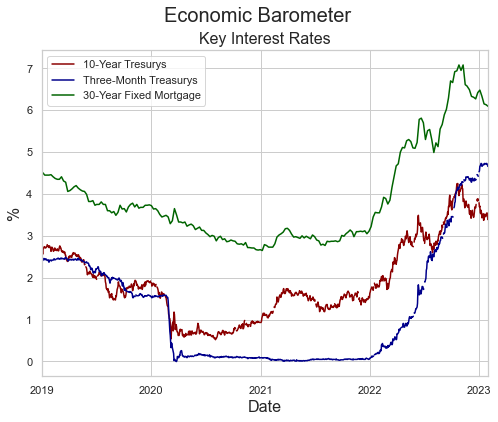

In [10]:
ten_year = fred.get_series("DGS10", observation_start='2019-01-01')
three_month = fred.get_series("DGS3MO", observation_start='2019-01-01')
ffr = fred.get_series("FEDFUNDS", observation_start='2019-01-01')
mortgage = fred.get_series("MORTGAGE30US", observation_start='2019-01-01')
yield_curve = fred.get_series("T10Y3M", observation_start='2019-01-01')

ten_year.plot(c='darkred', label='10-Year Tresurys', figsize=(8, 6), )
three_month.plot(color='darkblue', label='Three-Month Treasurys')
mortgage.plot(color='darkgreen', label='30-Year Fixed Mortgage')
plt.suptitle('Economic Barometer', fontsize=20)
plt.title('Key Interest Rates', fontsize=16)
plt.legend()
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)

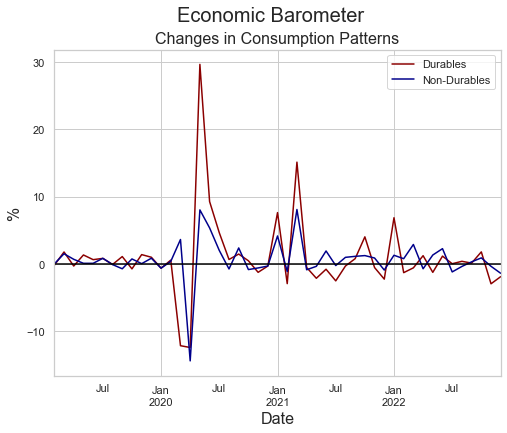

In [11]:
df = {}
df['Durables'] = fred.get_series("PCEDG", observation_start='2019-01-01').dropna()
df['Non-Durables'] = fred.get_series("PCEND", observation_start='2019-01-01').dropna()
df = pd.DataFrame(df)
df = df.pct_change(periods=1).dropna() * 100

colors = (["darkred", "darkblue"])
df.plot(figsize=(8, 6), color = colors)
plt.suptitle('Economic Barometer', fontsize=20)
plt.title('Changes in Consumption Patterns', fontsize=16)
plt.legend()
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axhline(0, color='black')

Text(0, 0.5, 'Millions ($)')

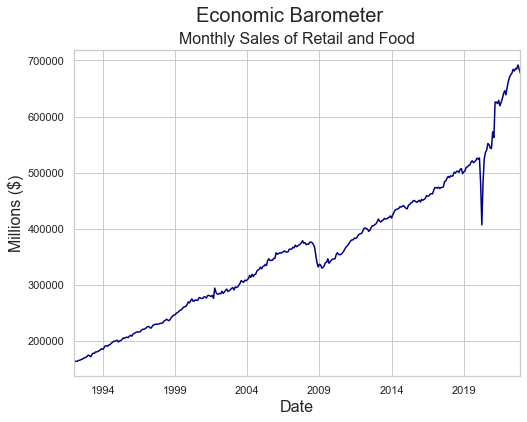

In [12]:
sales = fred.get_series("RSAFS", observation_start='1990-01-01')
sales.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Economic Barometer', fontsize=20)
plt.title('Monthly Sales of Retail and Food', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Millions ($)', fontsize=16)

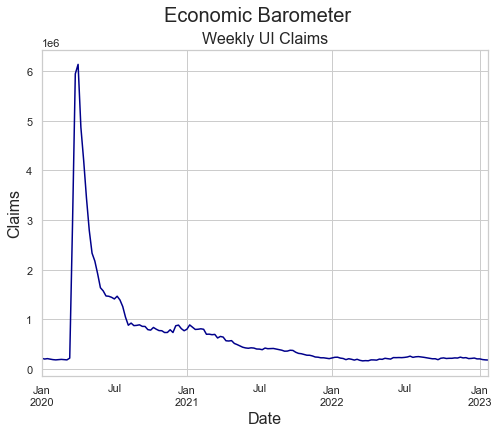

In [13]:
claims = fred.get_series("ICSA", observation_start='2020-01-01')
claims.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Economic Barometer', fontsize=20)
plt.title('Weekly UI Claims', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Claims', fontsize=16)
plt.axvline(dt.datetime(2008, 9, 15), color="red")

Text(0, 0.5, '%')

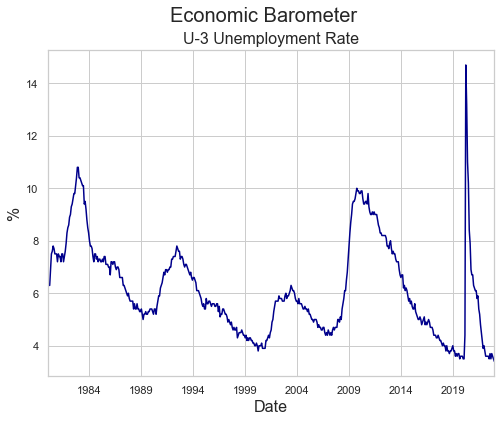

In [14]:
unemp_rate = fred.get_series("UNRATE", observation_start='1980-01-01')
unemp_rate.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Economic Barometer', fontsize=20)
plt.title('U-3 Unemployment Rate', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)

Text(0, 0.5, '%')

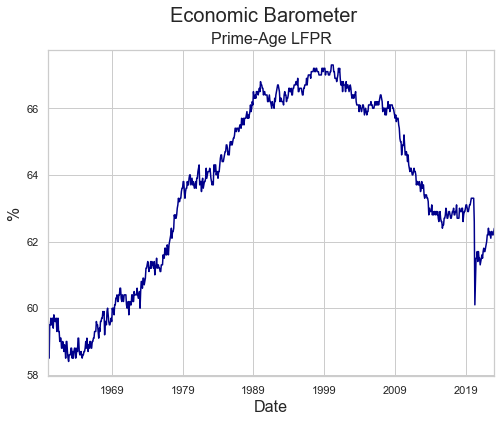

In [15]:
lfpr = fred.get_series("CIVPART", observation_start='1960-01-01')
lfpr.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Economic Barometer', fontsize=20)
plt.title('Prime-Age LFPR', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)

Text(0, 0.5, 'Thousands of Adults')

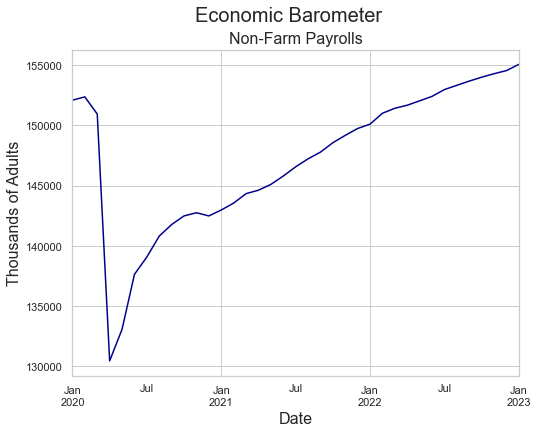

In [16]:
jobs = fred.get_series("PAYEMS", observation_start='2020-01-01')
jobs.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Economic Barometer', fontsize=20)
plt.title('Non-Farm Payrolls', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Thousands of Adults', fontsize=16)

Text(0, 0.5, 'Dollars')

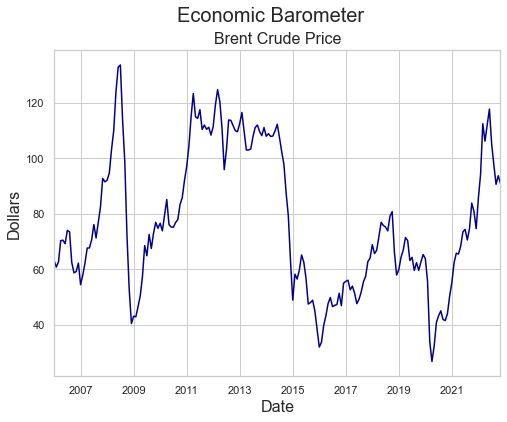

In [17]:
brent = fred.get_series("POILBREUSDM", observation_start='2006-01-01')
brent.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Economic Barometer', fontsize=20)
plt.title('Brent Crude Price', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Dollars', fontsize=16)

## Visualizations as Sufficient Statistics
* [Source](https://github.com/owid/covid-19-data/tree/master/public/data/vaccinations)

In [18]:
current_population = 332403650 * 0.94
vaccination = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv')
vaccination = vaccination[vaccination['location'] == 'United States']
vaccination = vaccination[40:]
vaccination['date'].astype(str)
vaccination['date'] = pd.to_datetime(vaccination['date'], format='%Y-%m-%d')
vaccination = vaccination.set_index('date')
vaccination['people_outstanding'] = (current_population - vaccination['people_fully_vaccinated'])
vaccination['outstanding'] = (current_population - vaccination['people_fully_vaccinated']) / current_population * 100
vaccination['rate'] = vaccination['daily_vaccinations_per_million'] / 1000000 

Text(0, 0.5, '%')

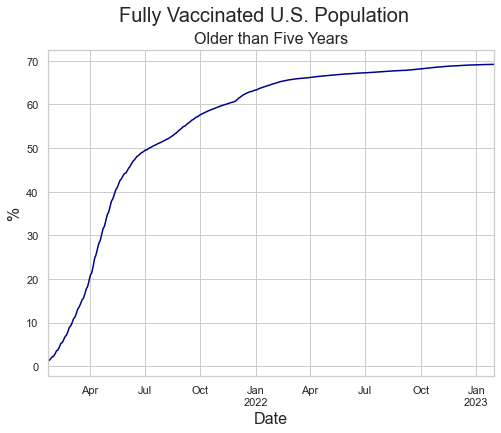

In [19]:
vaccination['people_fully_vaccinated_per_hundred'].plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Fully Vaccinated U.S. Population', fontsize=20)
plt.title('Older than Five Years', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)

Text(0, 0.5, '%')

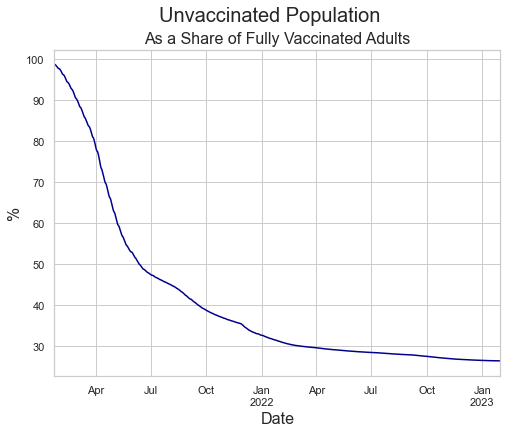

In [20]:
vaccination['outstanding'].plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Unvaccinated Population', fontsize=20)
plt.title('As a Share of Fully Vaccinated Adults', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)

Text(0, 0.5, '%')

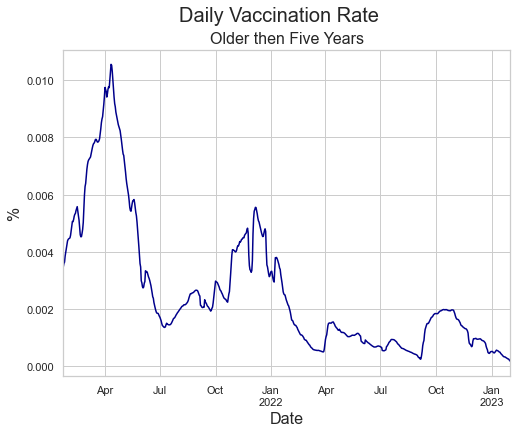

In [21]:
vaccination['rate'].plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Daily Vaccination Rate', fontsize=20)
plt.title('Older then Five Years', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)